# Quickstart

Here is a quick demonstration of some of the main things PolarToolkit can do. This assumes you know a bit of Python and have [successfully installed](install.md) this packaged. See the [tutorials](tutorial/index.md) for a step-by-step introduction to PolarToolkit, and the [how-to guides](how_to/index.md) for more in-depth guides for specific features.

Import the various modules of PolarToolkit.

In [1]:
%load_ext autoreload
%autoreload 2

from polartoolkit import fetch, maps, profiles, regions

Inform PolarToolkit that we are interested in the southern hemisphere (Antarctica) as opposed to the northern hemisphere (Arctic/Greenland) for this notebook.

In [2]:
import os

os.environ["POLARTOOLKIT_HEMISPHERE"] = "south"

Use the PolarToolkit `fetch` module to download some gridded Antarctic ice thickness data from Bedmap3 and return the portion around the Amery Ice Shelf using the `region` module.

In [3]:
ice_thickness = fetch.bedmap3(
    layer="ice_thickness",
    region=regions.amery_ice_shelf,
)

Create a simple map with a few optional embellishments with the `maps` module.

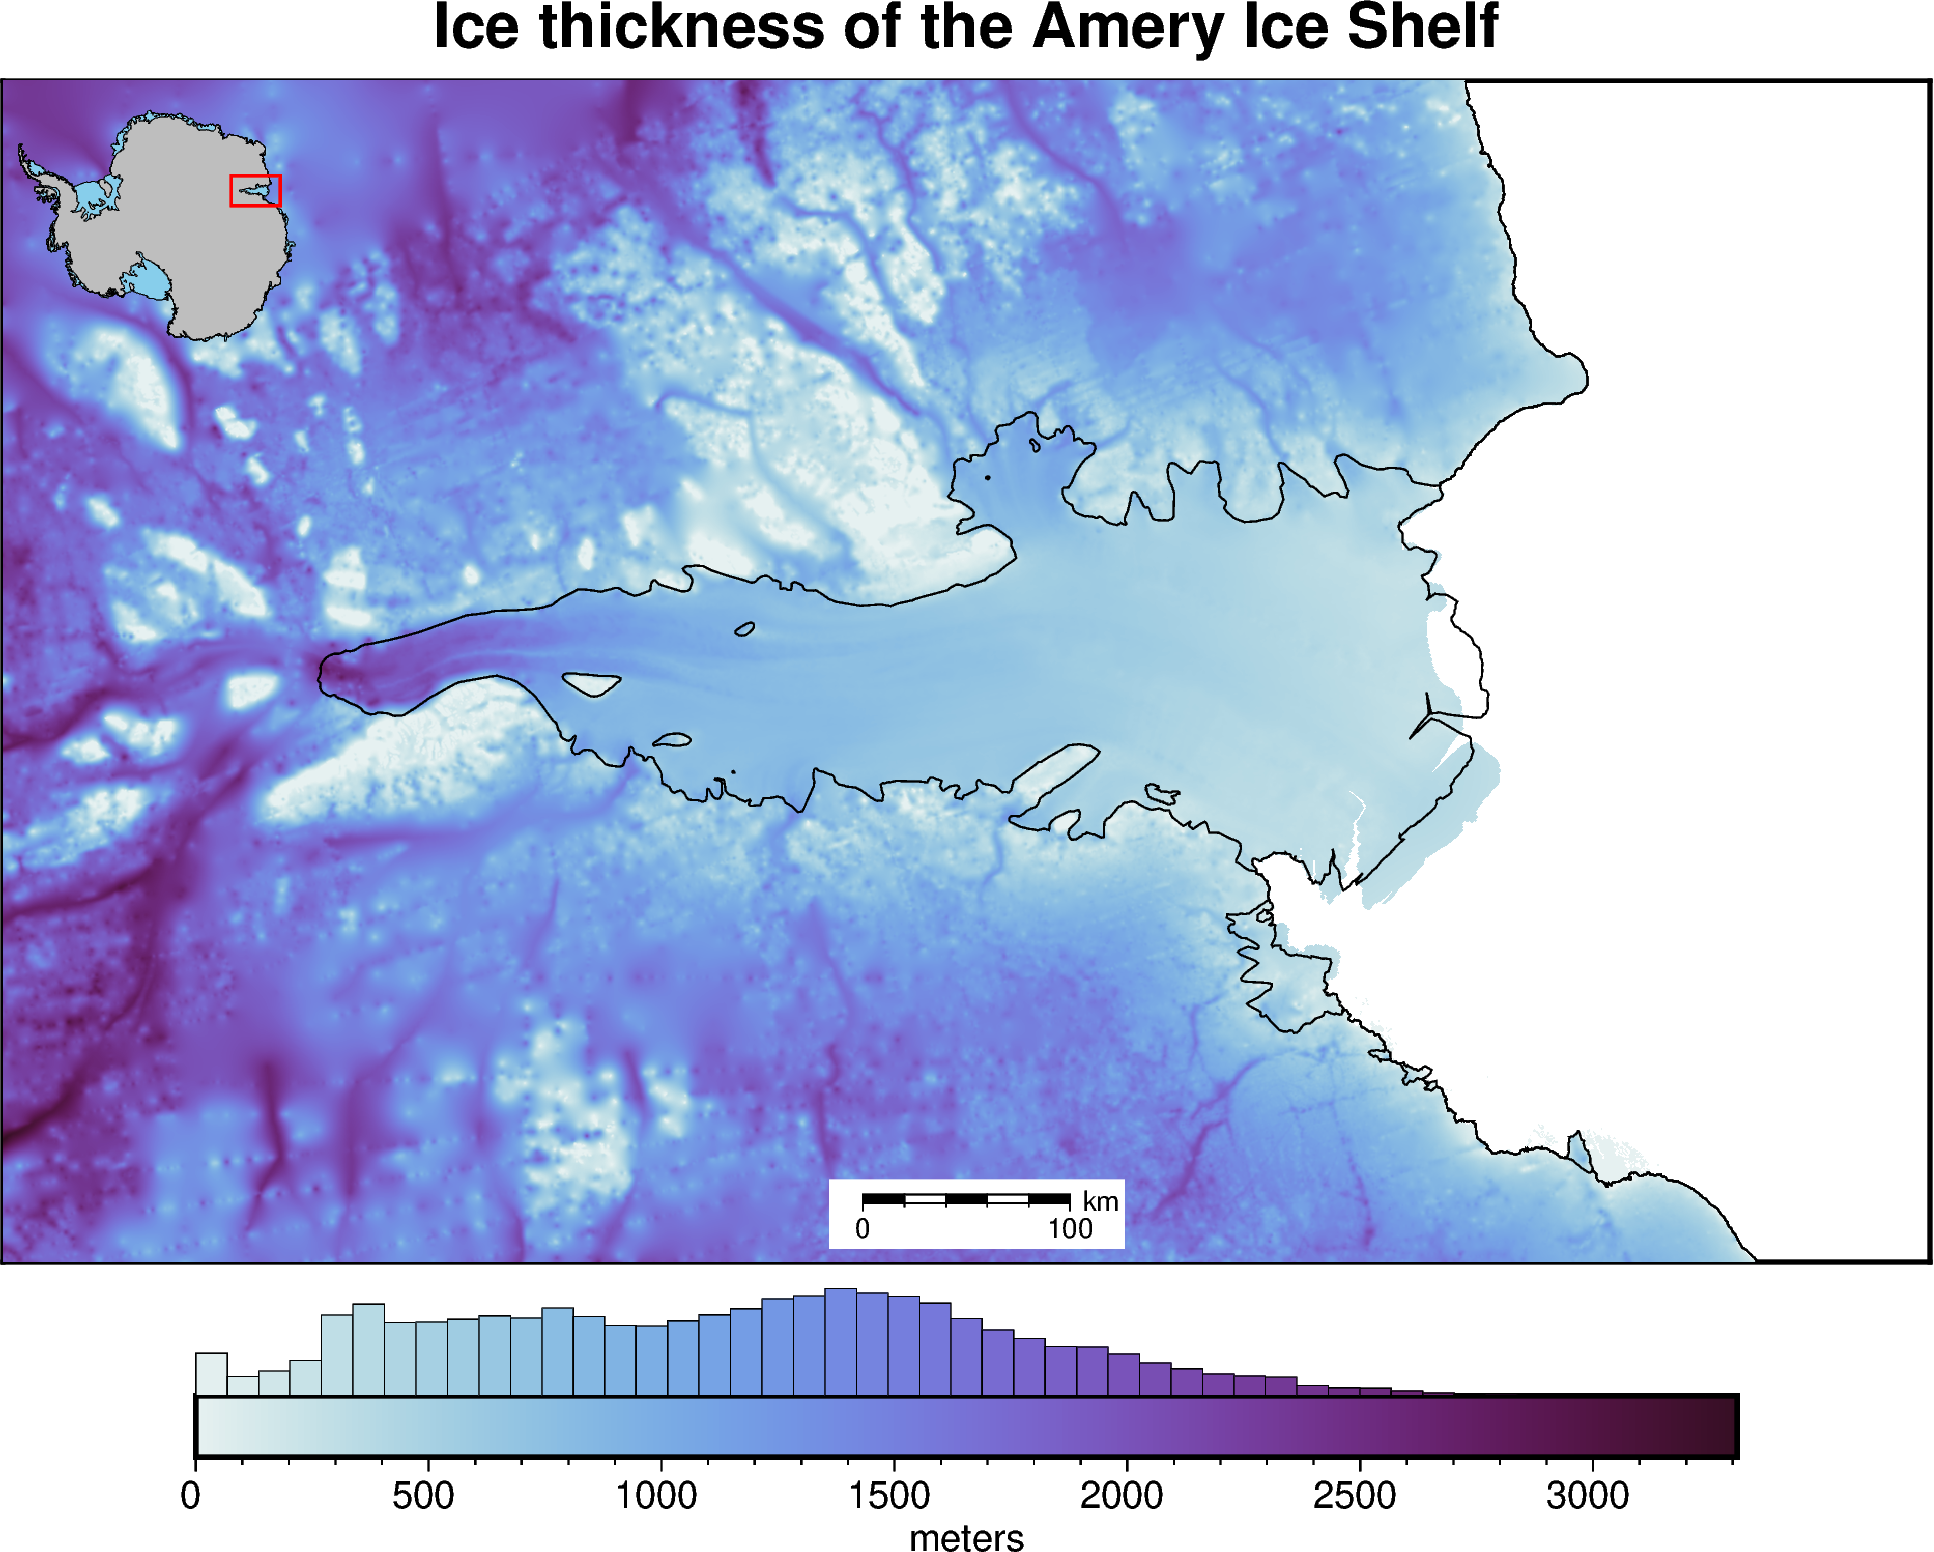

In [4]:
fig = maps.plot_grd(
    ice_thickness,
    title="Ice thickness of the Amery Ice Shelf",
    cbar_label="meters",
    cmap="dense",
    inset=True,
    coast=True,
    scalebar=True,
    hist=True,
)

fig.show(dpi=200)

Define a profile between two points and plot a cross section of ice, ocean, and earth layers from Bedmap3 using the `profiles` module. 

gmtset [WARNING]: Representation of font type not recognized. Using default.


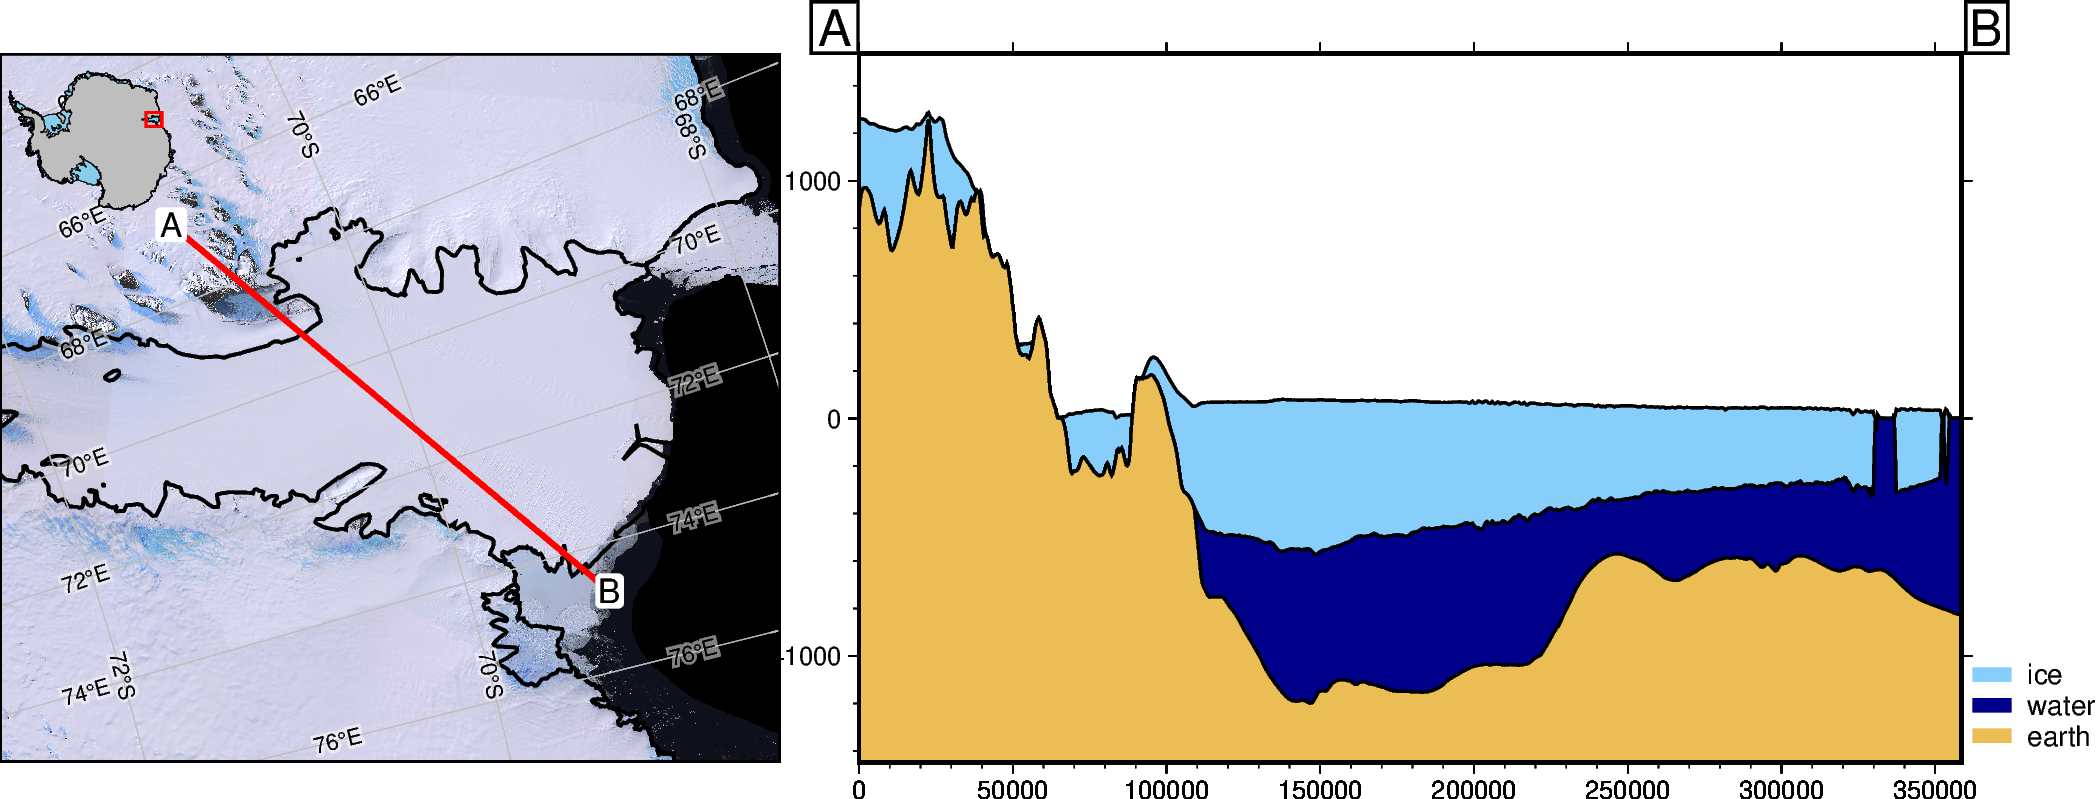

In [5]:
# meters east and north of the south pole in EPSG 3031
a = (1925000, 830000)
b = (2200000, 600000)

fig, _, _ = profiles.plot_profile(
    method="points",
    start=a,
    stop=b,
    add_map=True,
    layers_version="bedmap3",
)
fig.show(dpi=200)